In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,accuracy_score
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputClassifier

In [39]:
np.random.seed(95)

In [40]:
categories = [
    "Electronics", "Books", "Home", "Fashion", "Sports", "Beauty", "Toys",
    "Grocery", "Automotive", "Jewelry", "Music", "Garden", "Health", 
    "Pet Supplies", "Office Supplies"
]

In [41]:
df = {
    "Ad_Interaction_Count": np.random.randint(0, 50, size=30),
    "Average_Monthly_Spend": np.random.randint(500, 5000, size=30),
    "Recently_Bought_Categories": [
        np.random.choice(categories, size=5, replace=False).tolist() for _ in range(30)
    ],
    "Has_Credit_Card": np.random.choice([0, 1], size=30, p=[0.6, 0.4])
}

df = pd.DataFrame(df)
df

,Ad_Interaction_Count,Average_Monthly_Spend,Recently_Bought_Categories,Has_Credit_Card
0,22,1660,"[Toys, Pet Supplies, Sports, Health, Office Su...",1
1,41,2104,"[Beauty, Home, Books, Pet Supplies, Jewelry]",1
2,19,671,"[Health, Beauty, Electronics, Music, Grocery]",0
3,5,3194,"[Books, Garden, Beauty, Automotive, Electronics]",0
4,2,4310,"[Home, Health, Jewelry, Books, Office Supplies]",1
5,36,642,"[Beauty, Health, Grocery, Automotive, Office S...",0
6,23,3703,"[Books, Beauty, Garden, Fashion, Toys]",0
7,2,1855,"[Automotive, Pet Supplies, Fashion, Sports, Bo...",0
8,33,1618,"[Pet Supplies, Music, Beauty, Books, Office Su...",1
9,32,3111,"[Jewelry, Office Supplies, Electronics, Pet Su...",0


In [42]:
df.to_csv("3_amazon.csv")

In [43]:
df['Recently_Bought_Categories'] = df['Recently_Bought_Categories'].astype(str)
df['Recently_Bought_Categories'] = df['Recently_Bought_Categories'].apply(eval)

In [44]:
mlb = MultiLabelBinarizer()
categories_encoded = mlb.fit_transform(df['Recently_Bought_Categories'])
categories_df = pd.DataFrame(categories_encoded, columns=mlb.classes_)
processed_data = pd.concat([df.drop(columns=['Recently_Bought_Categories']), categories_df], axis=1)
processed_data



,Ad_Interaction_Count,Average_Monthly_Spend,Has_Credit_Card,Automotive,Beauty,Books,Electronics,Fashion,Garden,Grocery,Health,Home,Jewelry,Music,Office Supplies,Pet Supplies,Sports,Toys
0,22,1660,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1
1,41,2104,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
2,19,671,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0
3,5,3194,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0
4,2,4310,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0
5,36,642,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0
6,23,3703,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1
7,2,1855,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0
8,33,1618,1,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0
9,32,3111,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0


In [47]:
processed_data.to_csv("converted.csv")

In [45]:
X_binary = processed_data.drop(columns=['Has_Credit_Card'])
y_binary = processed_data['Has_Credit_Card']
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=95)

rf = RandomForestClassifier(random_state=95)
rf.fit(X_train, y_train)

y_pred_binary = rf.predict(X_test)
accuracy_binary = accuracy_score(y_test, y_pred_binary)
report_binary = classification_report(y_test, y_pred_binary)

accuracy_binary, report_binary

(0.5,
 '              precision    recall  f1-score   support\n\n           0       0.67      0.50      0.57         4\n           1       0.33      0.50      0.40         2\n\n    accuracy                           0.50         6\n   macro avg       0.50      0.50      0.49         6\nweighted avg       0.56      0.50      0.51         6\n')

In [46]:
X_multi = processed_data[['Ad_Interaction_Count', 'Average_Monthly_Spend']]
y_multi = processed_data.drop(columns=['Has_Credit_Card', 'Ad_Interaction_Count', 'Average_Monthly_Spend'])
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=95)

rf_multi = MultiOutputClassifier(RandomForestClassifier(random_state=95))
rf_multi.fit(X_train, y_train)

# Predict and evaluate
y_pred_multi = rf_multi.predict(X_test)
accuracy_per_label = (y_test == y_pred_multi).mean()

accuracy_per_label

Automotive         0.833333
Beauty             0.500000
Books              0.500000
Electronics        0.500000
Fashion            0.666667
Garden             0.833333
Grocery            0.666667
Health             0.666667
Home               0.333333
Jewelry            0.500000
Music              0.333333
Office Supplies    0.500000
Pet Supplies       0.500000
Sports             0.833333
Toys               0.666667
dtype: float64

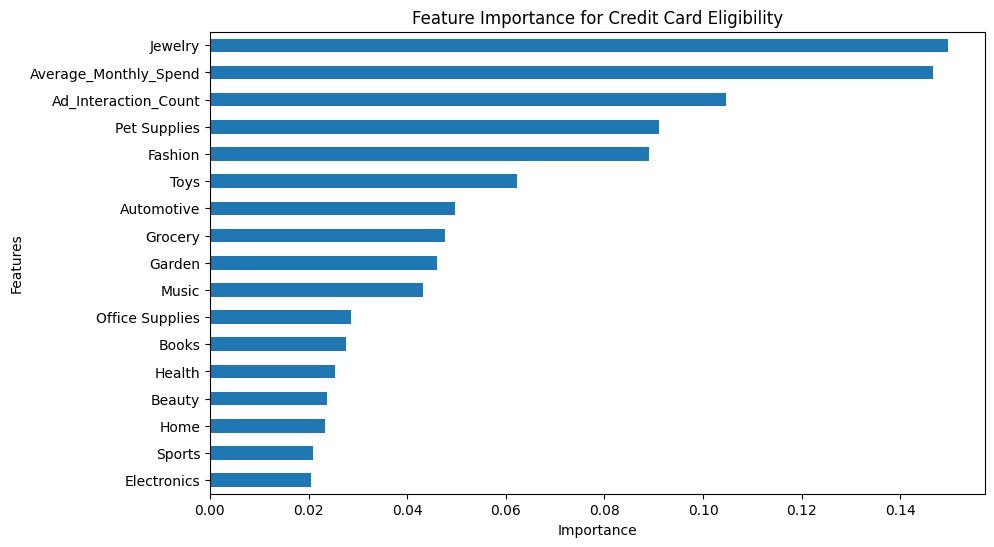

In [49]:
feature_importances_binary = pd.Series(rf.feature_importances_, index=X_binary.columns)

plt.figure(figsize=(10, 6))
feature_importances_binary.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance for Credit Card Eligibility')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [51]:
top_features = feature_importances_binary.sort_values(ascending=False)
top_features_df = pd.DataFrame({
    'Feature': top_features.index,
    'Importance': top_features.values
})

top_features_df


,Feature,Importance
0,Jewelry,0.149671
1,Average_Monthly_Spend,0.146603
2,Ad_Interaction_Count,0.104571
3,Pet Supplies,0.091089
4,Fashion,0.089088
5,Toys,0.062191
6,Automotive,0.049686
7,Grocery,0.047656
8,Garden,0.046069
9,Music,0.043183
